## Project 3

In this project you will use matrix visualisation techniques to explore Iris data and your chosen dataset from the World Bank website.

**Please make sure all your plots have appropriate axes labels, titles, and legends (if applicable)!**

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Part 1**. Iris dataset
This dataset looks at features of <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris flowers</a>. The questions ask you to apply standard visualisation techniques to this dataset. First, import and examine the data.


In [38]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(
    iris.data, 
    columns=iris.feature_names
)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: "setosa", 1: "versicolor", 2: "virginica"})
# Shuffle the data
iris_df = iris_df.sample(frac=1, random_state=42)


### Q1. Produce the correlation matrix as a heatmap showing the correlation between the different numeric features of the iris flowers.

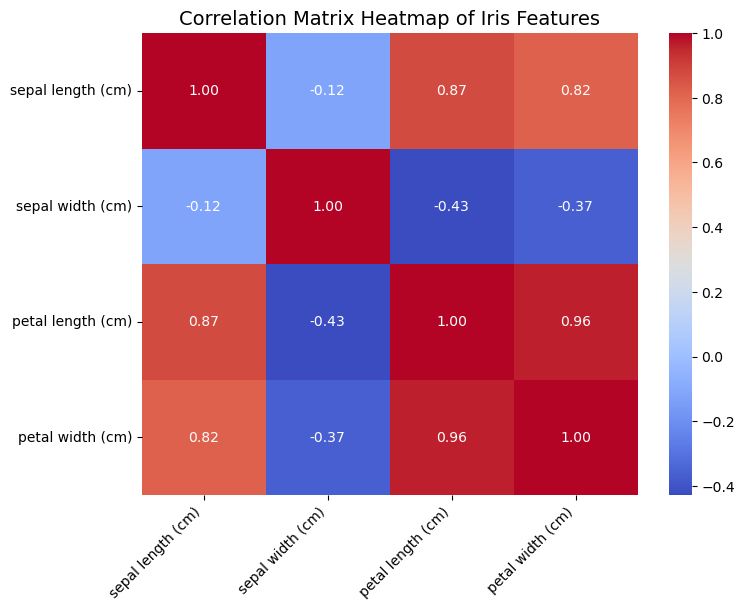

In [39]:
# Calculate the correlation matrix
correlation_matrix = iris_df.iloc[:, :-1].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and rotate x-axis labels for better readability
plt.title("Correlation Matrix Heatmap of Iris Features", fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

### Q2. Produce a pairplot that visualises the iris data features as scatter plots and histograms between different features. Colour the data according to the three types of iris (given in ``iris_df['species']``). The exact layout and use of kernel density estimation (KDE) for some of the plots is up to you.

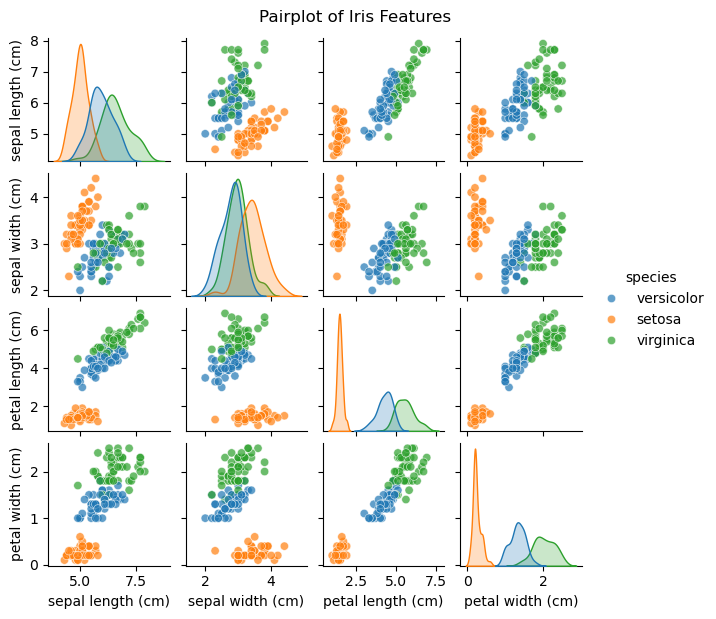

In [40]:
# Create the pairplot
sns.pairplot(iris_df, diag_kind="kde", hue="species", plot_kws={'alpha': 0.7}, height=1.5)
plt.suptitle("Pairplot of Iris Features", y=1.02)

plt.show()

### Q3. Produce a distance matrix between each pair of data points in the iris dataset. Plot the distance matrix as a heatmap.

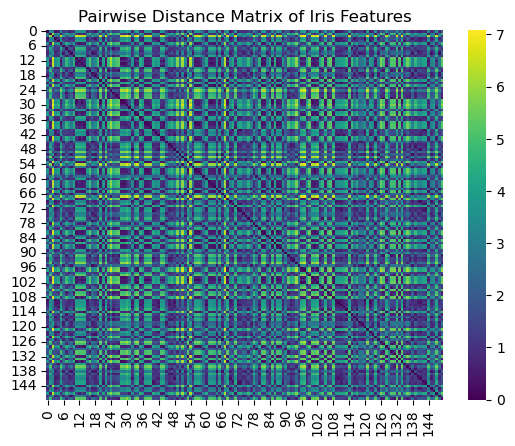

In [41]:
from scipy.spatial.distance import pdist, squareform

# Select only the numeric features for distance calculation
iris_numeric = iris_df.iloc[:, :-1]  # Exclude the 'species' column

# Compute pairwise distances and convert them into a square matrix
distances = squareform(pdist(iris_numeric))

# Plot the heatmap
sns.heatmap(distances, cmap="viridis", cbar=True)
plt.title("Pairwise Distance Matrix of Iris Features")
plt.show()


### Q4. Use a clustermap to hierarchically cluster the distance matrix. The choise of ``method`` (linkage criterion) and ``metric`` (distance between points) is up to you.

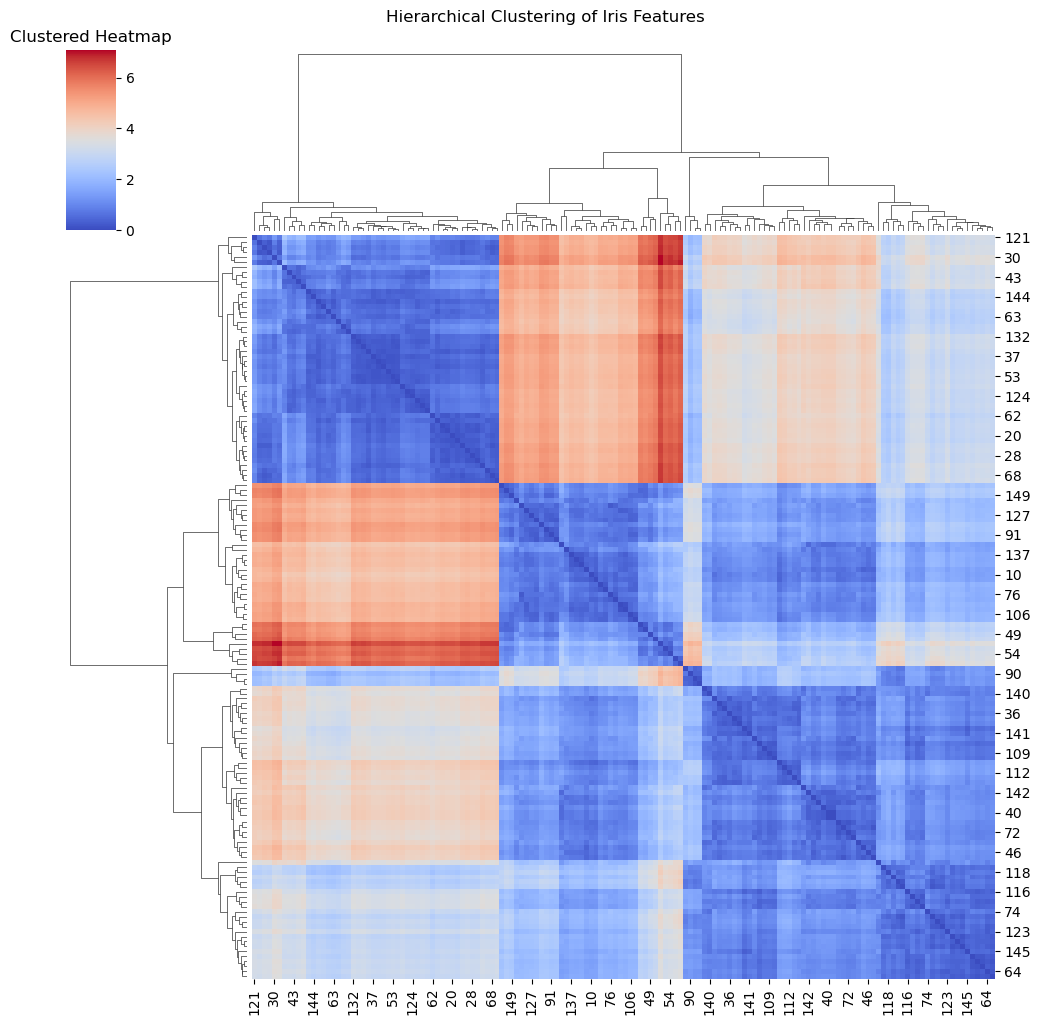

In [42]:
# Plot the clustermap
sns.clustermap(distances, cmap="coolwarm", method="average", metric="euclidean")
plt.suptitle("Hierarchical Clustering of Iris Features", y=1.02)
plt.title("Clustered Heatmap")

plt.show()

### Q5. Using K-means algorithm from sklearn, cluster the distance data into 3 clusters. Produce a scatter plot for petal width against petal length where each datapoint is colored according to the cluster assignment. Then produce the same scatter plot but use the true labels (``'species``) to colour the datapoints. Do the K-means clusters and the true labales coinside?

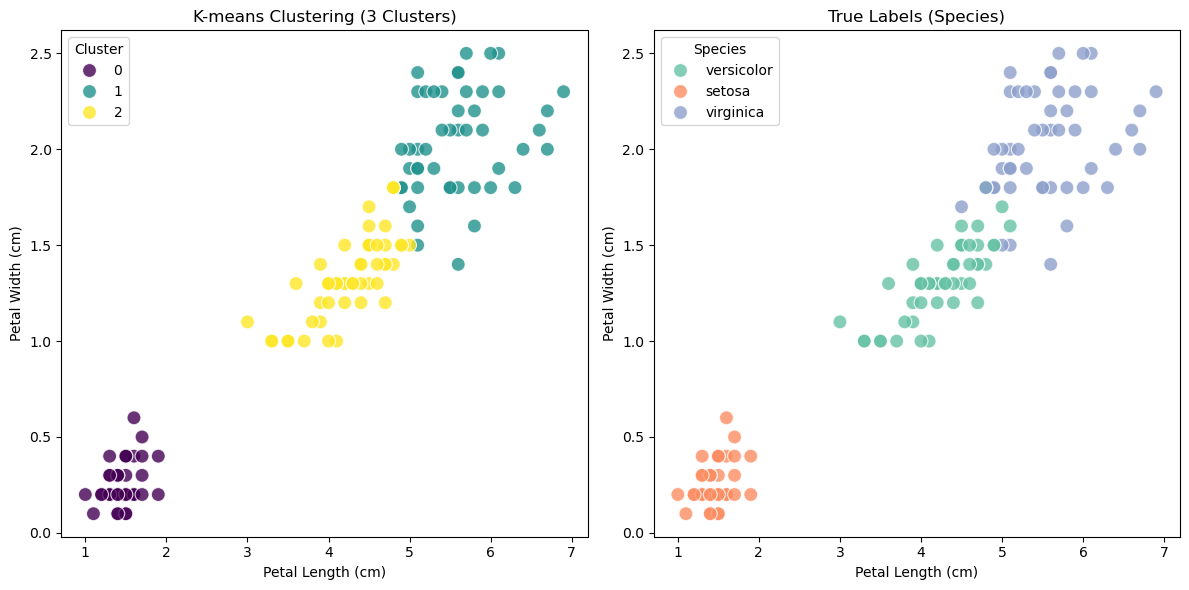

Cluster Assignments vs. True Labels:
kmeans_cluster   0   1   2
species                   
setosa          50   0   0
versicolor       0   2  48
virginica        0  46   4


In [43]:
from sklearn.cluster import KMeans

# Select only petal width and petal length for clustering
petal_data = iris_df[['petal width (cm)', 'petal length (cm)']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['kmeans_cluster'] = kmeans.fit_predict(petal_data)

# Plot scatter plots with cluster assignments
plt.figure(figsize=(12, 6))

# Scatter plot colored by K-means clusters
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='petal length (cm)', 
    y='petal width (cm)', 
    hue='kmeans_cluster', 
    data=iris_df, 
    palette='viridis', 
    s=100, 
    alpha=0.8
)
plt.title("K-means Clustering (3 Clusters)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Cluster", loc='best')

# Scatter plot colored by true species labels
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='petal length (cm)', 
    y='petal width (cm)', 
    hue='species', 
    data=iris_df, 
    palette='Set2', 
    s=100, 
    alpha=0.8
)
plt.title("True Labels (Species)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species", loc='best')

# Show the plots
plt.tight_layout()
plt.show()

# Check alignment between K-means clusters and true species labels
print("Cluster Assignments vs. True Labels:")
print(pd.crosstab(iris_df['species'], iris_df['kmeans_cluster']))


No, they do not fully coincide. The groups created by K-means clustering (Cluster 0, Cluster 1, Cluster 2) do not perfectly match the actual categories of the iris species. While setosa aligns perfectly with cluster 0, versicolor and virginica exhibit some misclassification. Specifically, cluster 1 contains mostly virginica (46 points), with 2 misclassified versicolor points. Cluster 2 contains mostly versicolor (48 points), with 4 misclassified virginica points.

## **Part 2**. You are asked to choose some indicators (economic, development, education, environmental, etc) from the <a href="https://data.worldbank.org/indicator?tab=featured">World Bank dataset</a> and produce **three** plots that explore your chosen data.

Please write a very short description of each figure (no more than 2 sentences!) and a short conclusion at the end (again, no more than 2 sentences!). Please include these as Markdown cells in your notebook where appropriate (e.g. just before or just after the figures).

In [44]:
import pandas as pd

co2_data = pd.read_csv('API_EN.GHG.CO2.PC.CE.AR5_DS2_en_csv_v2_4414.csv', skiprows=4)
renewable_data = pd.read_csv('API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_223.csv', skiprows=4)
forest_area_data = pd.read_csv('API_AG.LND.FRST.ZS_DS2_en_csv_v2_102.csv', skiprows=4)

# Selected countries
countries = ["United States", "France", "United Kingdom", "China", "India"]

# Filter data for selected countries
co2_filtered = co2_data[co2_data["Country Name"].isin(countries)]
renewable_filtered = renewable_data[renewable_data["Country Name"].isin(countries)]
forest_filtered = forest_area_data[forest_area_data["Country Name"].isin(countries)]

# Select years 2005-2020
years = list(range(2005, 2020))
columns = ["Country Name"] + [str(year) for year in years]

co2_filtered = co2_filtered[columns]
renewable_filtered = renewable_filtered[columns]
forest_filtered = forest_filtered[columns]

# Reshape data to long format for easier plotting
co2_long = pd.melt(co2_filtered, id_vars=["Country Name"], var_name="Year", value_name="CO2 Emissions")
renewable_long = pd.melt(renewable_filtered, id_vars=["Country Name"], var_name="Year", value_name="Renewable Energy")
forest_long = pd.melt(forest_filtered, id_vars=["Country Name"], var_name="Year", value_name="Forest Area")

# Merge datasets on Country Name and Year
merged_data = co2_long.merge(renewable_long, on=["Country Name", "Year"])
merged_data = merged_data.merge(forest_long, on=["Country Name", "Year"])

# Ensure Year is numeric
merged_data["Year"] = merged_data["Year"].astype(int)


**Figure 1: Pairplot of CO2 Emissions, Renewable Energy, and Forest Area**

This pairplot visualizes the relationships between CO2 emissions, renewable energy consumption, and forest area for United States, France, United Kingdom, China, and India, from 2005 to 2020. It highlights the distributions of each variable and potential correlations across the countries.

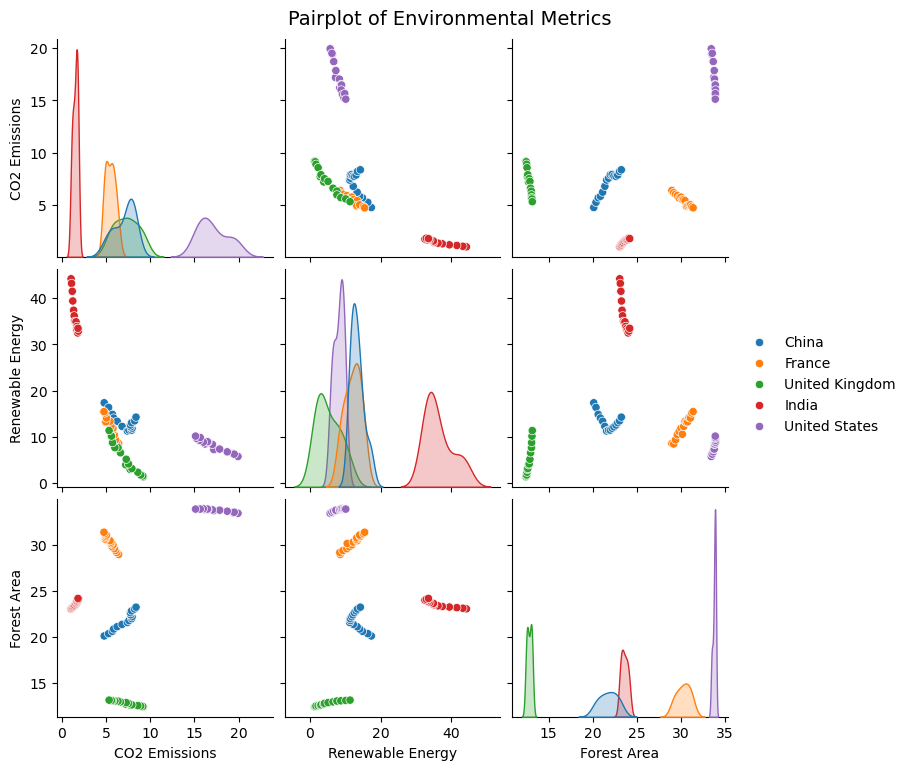

In [45]:
# Pairplot for correlations
pairplot = sns.pairplot(merged_data, hue="Country Name", diag_kind="kde", 
                        vars=["CO2 Emissions", "Renewable Energy", "Forest Area"])
pairplot._legend.set_title('')
plt.suptitle("Pairplot of Environmental Metrics", y=1.02, fontsize=14)
plt.show()

**Figure 2: Heatmap of Variable Correlations**

The heatmap shows the strength and direction of correlations between CO2 emissions, renewable energy consumption, and forest area across all selected countries. It reveals a moderate negative relationship between CO2 emissions and renewable energy consumption, and a moderate positive relationship between CO2 emissions and forest area.

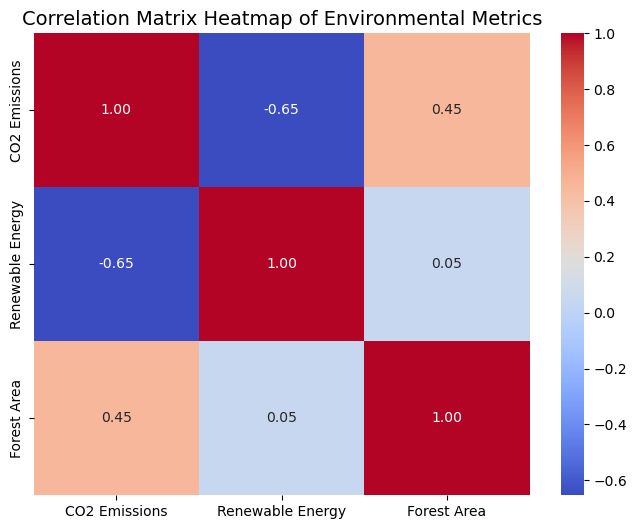

In [46]:
# Compute correlations for the heatmap
correlation_matrix = merged_data[["CO2 Emissions", "Renewable Energy", "Forest Area"]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap of Environmental Metrics", fontsize=14)
plt.show()

**Figure 3: Time Series of CO2 Emissions, Renewable Energy, and Forest Area (2005–2020)**

These time series plots illustrate the changes in CO2 emissions, renewable energy consumption, and forest area for United States, France, United Kingdom, China, and India, from 2005 to 2020. They allow for country-wise comparisons and highlight variations across the three variables.

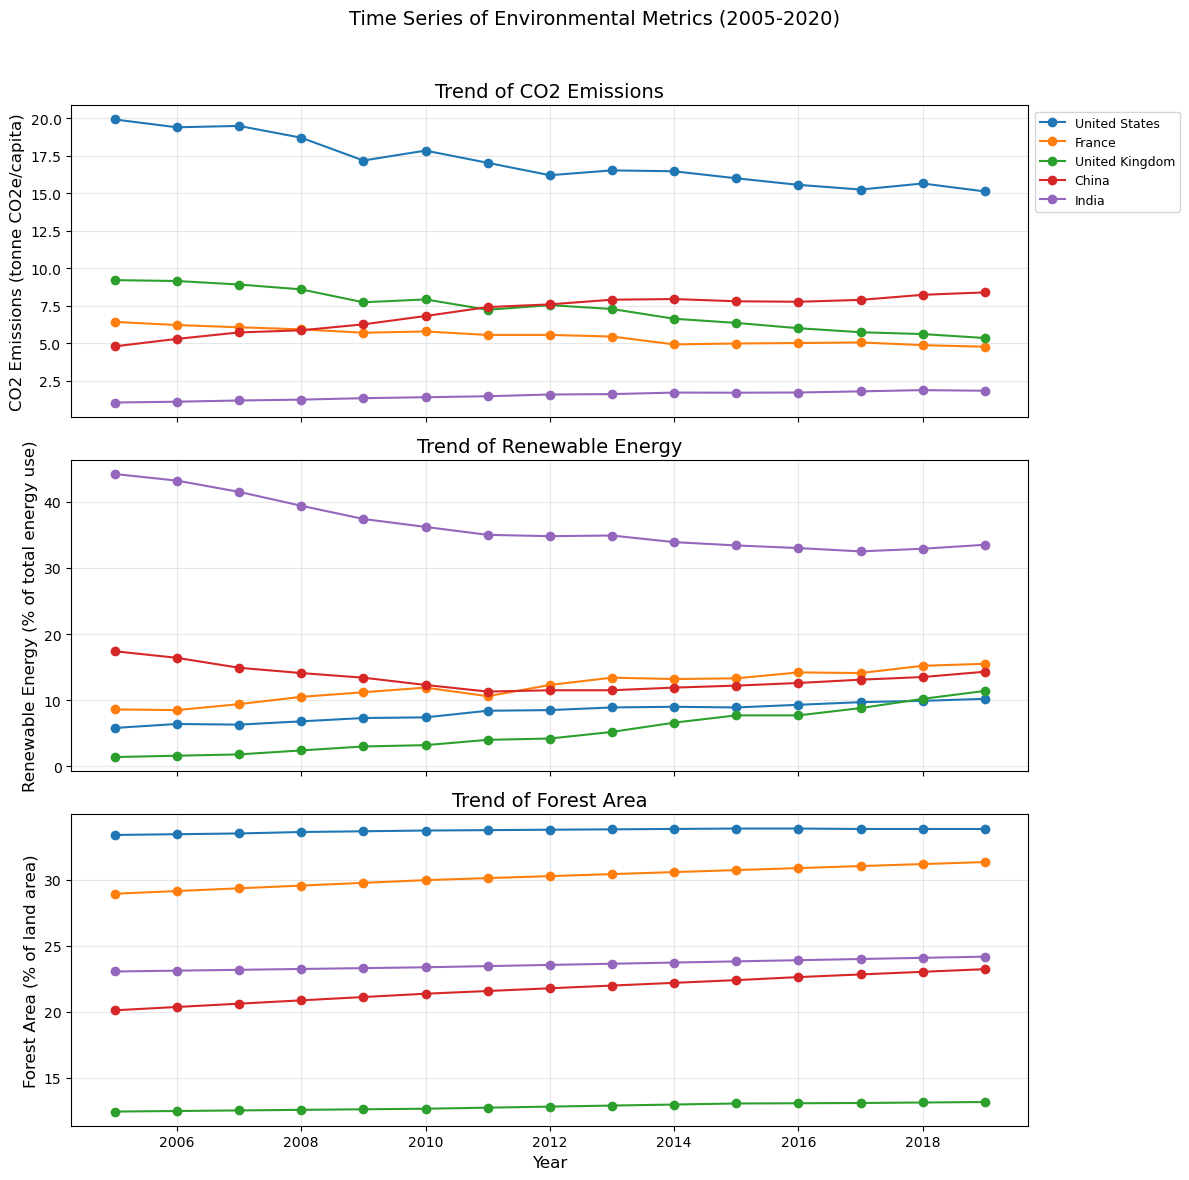

In [47]:
# Time series plots for each variable
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Variable names and corresponding y-labels
variables = ["CO2 Emissions", "Renewable Energy", "Forest Area"]
y_labels = [
    "CO2 Emissions (tonne CO2e/capita)",
    "Renewable Energy (% of total energy use)",
    "Forest Area (% of land area)",
]

# Plot each variable on its own subplot
for i, var in enumerate(variables):
    ax = axes[i]
    for country in countries:
        country_data = merged_data[merged_data["Country Name"] == country]
        ax.plot(
            country_data["Year"],
            country_data[var],
            label=country,
            marker="o"
        )
    ax.set_ylabel(y_labels[i], fontsize=12)
    ax.grid(alpha=0.3)
    ax.set_title(f"Trend of {var}", fontsize=14)

axes[-1].set_xlabel("Year", fontsize=12)
fig.suptitle("Time Series of Environmental Metrics (2005-2020)", fontsize=14)
axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=9)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Conclusion**

The visualizations reveal relationships and trends in emissions, energy consumption, and forest coverage across countries and over time. Notable variations exist between developed and developing economies, highlighting the need for tailored climate policies.